In [2]:
import pandas as pd

pd.set_option('display.max_rows', 30)

### Loading the data dictionary from the file

In [18]:
# loading the data dictionary
file_name = 'institution_data_dictionary.csv'
df_data_dict_inst = pd.read_csv(file_name)
df_data_dict_inst.shape

(3251, 11)

### This shows that the data dictionary has 3251 rows. We can consider those as the features in our dataet. The data dictionary has data on the various columns and the definition of those columns. It would help to chose the features to start the analysis.

In [19]:
# Displaying some sample values of the data dictionary
df_data_dict_inst

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
0,Unit ID for institution,root,id,integer,NaN,UNITID,NaN,NaN,IPEDS,Yes,NaN
1,8-digit OPE ID for institution,root,ope8_id,string,varchar(10),OPEID,NaN,NaN,IPEDS,Yes,NaN
2,6-digit OPE ID for institution,root,ope6_id,string,varchar(10),OPEID6,NaN,NaN,IPEDS,Yes,NaN
3,Institution name,school,name,autocomplete,fulltext,INSTNM,NaN,NaN,IPEDS,Yes,NaN
4,City,school,city,autocomplete,varchar(200),CITY,NaN,NaN,IPEDS,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3246,Median earnings of students working and not en...,earnings,10_yrs_after_entry.median_earnings.highest_ter...,integer,NaN,MD_EARN_WNE_INC3_P10,NaN,NaN,Treasury,NaN,NaN
3247,Median earnings of independent students workin...,earnings,10_yrs_after_entry.median_earnings.independent...,integer,NaN,MD_EARN_WNE_INDEP1_P10,NaN,NaN,Treasury,NaN,NaN
3248,Median earnings of dependent students working ...,earnings,10_yrs_after_entry.median_earnings.dependent_s...,integer,NaN,MD_EARN_WNE_INDEP0_P10,NaN,NaN,Treasury,NaN,NaN
3249,Median earnings of non-male students working a...,earnings,10_yrs_after_entry.median_earnings.non_male_st...,integer,NaN,MD_EARN_WNE_MALE0_P10,NaN,NaN,Treasury,NaN,NaN


In [6]:
### Getting to know which variables to pick for feature selection
df_subset_data_dict = df_data_dict_inst[['NAME OF DATA ELEMENT','dev-category','VARIABLE NAME','VALUE','LABEL']]

In [9]:
## Looking at the various categories and the count of the values and descriptions
df_subset_data_dict.groupby('dev-category').count()

,NAME OF DATA ELEMENT,VARIABLE NAME,VALUE,LABEL
dev-category,,,,
academics,247,247,3,41
admissions,26,26,1,1
aid,106,106,1,0
completion,1352,1352,0,0
cost,85,85,0,0
earnings,116,116,0,0
repayment,887,887,0,0
root,6,6,0,0
school,47,47,158,159


In [11]:
### Getting to know which variables to pick for feature selection
df_subset_data_dict.loc[df_subset_data_dict['dev-category']=='earnings']

,NAME OF DATA ELEMENT,dev-category,VARIABLE NAME,VALUE,LABEL
1845,Count of students in the earnings cohort,earnings,COUNT_ED,NaN,NaN
1878,Number of students not working and not enrolle...,earnings,COUNT_NWNE_P10,NaN,NaN
1879,Number of students working and not enrolled 10...,earnings,COUNT_WNE_P10,NaN,NaN
1880,Mean earnings of students working and not enro...,earnings,MN_EARN_WNE_P10,NaN,NaN
1881,Median earnings of students working and not en...,earnings,MD_EARN_WNE_P10,NaN,NaN
...,...,...,...,...,...
3246,Median earnings of students working and not en...,earnings,MD_EARN_WNE_INC3_P10,NaN,NaN
3247,Median earnings of independent students workin...,earnings,MD_EARN_WNE_INDEP1_P10,NaN,NaN
3248,Median earnings of dependent students working ...,earnings,MD_EARN_WNE_INDEP0_P10,NaN,NaN
3249,Median earnings of non-male students working a...,earnings,MD_EARN_WNE_MALE0_P10,NaN,NaN


In [20]:
# Load the most recent data file with the instituion names
data_file_inst = 'dataset/CollegeScorecard_Raw_Data_03142022/Most-Recent-Cohorts-Institution.csv'
df_inst = pd.read_csv(data_file_inst, low_memory=False)

In [13]:
df_inst.shape

(6694, 2989)

In [15]:
'''
Creating the list of features for the earnings. Data on the earnings and employment prospects of former students can provide key information. 
To measure the labor market outcomes of individuals attending institutions of higher education, data on cohorts of federally aided undergraduate students were linked 
with earnings data from de-identified tax records and reported back at the aggregate, institutional level. Mean earnings data elements at the institution-level were 
last updated in the fall of 2018.
'''

'\nCreating the list of features for the earnings. Data on the earnings and employment prospects of former students can provide key information. \nTo measure the labor market outcomes of individuals attending institutions of higher education, data on cohorts of federally aided undergraduate students were linked \nwith earnings data from de-identified tax records and reported back at the aggregate, institutional level. Mean earnings data elements at the institution-level were \nlast updated in the fall of 2018.\n'

In [ ]:
list_of_earnings_features=['INSTNM','CITY','STABBR',]

## Preparing the feature list from the dictionary

In [104]:
# Listing down all the features that I could think of initially in order to do my analysis

list_of_all_features=['INSTNM','CITY','STABBR','ST_FIPS','PREDDEG','ICLEVEL','CONTROL','ADM_RATE','CURROPER','SATVR25','SATVR75','SATMT25','SATMT75','SATWR25','SATWR75',
                 'ACTCM25','ACTCM75','ACTEN25','ACTEN75','ACTMT25','ACTMT75','ACTWR25','ACTWR75']

### Cost Related features taken for consideration
> NPT4_PUB -  Average net price for Title IV institutions (public institutions)

> NPT4_PRIV - Average net price for Title IV institutions (private for-profit and nonprofit institutions)

> COSTT4_A - Average cost of attendance (academic year institutions)

> TUITIONFEE_IN - In-state tuition and fees

> TUITIONFEE_OUT - Out-of-state tuition and fees

In [8]:
# Getting a list of the financial related features
list_of_cost_features=['INSTNM','CITY','STABBR','ST_FIPS','PREDDEG','ICLEVEL','CONTROL','ADM_RATE','CURROPER','NPT4_PUB','NPT4_PRIV','COSTT4_A','TUITIONFEE_IN','TUITIONFEE_OUT']

In [21]:
df_features_inst = df_inst[list_of_all_features]
df_features_inst.shape

NameError: name 'list_of_all_features' is not defined

In [106]:
df_features_inst_subset_1=df_features_inst[['INSTNM','CITY','STABBR','ST_FIPS','PREDDEG','CURROPER']]
df_features_inst_subset_1.shape

(6694, 6)

In [107]:
df_features_inst_subset_2=df_features_inst[['INSTNM','CURROPER']]
df_features_inst_subset_2.shape

(6694, 2)

In [108]:
byCurrOperation = df_features_inst_subset_2.groupby('CURROPER')
byCurrOperation.count()

,INSTNM
CURROPER,
0,330
1,6364


### So this above output shows that there are 300 Institutions that are Not currently certified as an operating institution

In [110]:
# Filtering out the Institutions that are currently not operating
df_features_inst_curroper = df_features_inst.query("CURROPER == 1")
df_features_inst_curroper.shape

(6364, 23)

In [111]:
# Colleges by ADM rate
df_coll_adm_rate = df_features_inst_curroper[['INSTNM','CITY','PREDDEG','ICLEVEL','ADM_RATE']]
df_coll_adm_rate.shape

(6364, 5)

In [104]:
df_coll_adm_rate

,INSTNM,CITY,PREDDEG,ICLEVEL,ADM_RATE
0,Alabama A & M University,Normal,3,1,0.9175
1,University of Alabama at Birmingham,Birmingham,3,1,0.7366
2,Amridge University,Montgomery,2,1,NaN
3,University of Alabama in Huntsville,Huntsville,3,1,0.8257
4,Alabama State University,Montgomery,3,1,0.9690
...,...,...,...,...,...
6689,Georgia Military College - Eastman,Eastman,0,1,NaN
6690,American College of Barbering - Florence,Florence,0,3,NaN
6691,HCI College - Fort Lauderdale Campus,Fort Lauderdale,0,2,NaN
6692,ABC Adult School - Cabrillo Lane,Cerritos,0,3,NaN


In [113]:
# Sort by ADM Rate
df_coll_adm_rate = df_coll_adm_rate.query("ADM_RATE > 0.0 & ADM_RATE < 1.0")
df_coll_adm_rate.sort_values(by='ADM_RATE', ascending=True, na_position='last')

,INSTNM,CITY,PREDDEG,ICLEVEL,ADM_RATE
1464,Hampshire College,Amherst,3,1,0.0197
2806,Curtis Institute of Music,Philadelphia,3,1,0.0393
3765,Stanford University,Stanford,3,1,0.0434
1465,Harvard University,Cambridge,3,1,0.0464
391,Pacific Oaks College,Pasadena,3,1,0.0511
...,...,...,...,...,...
2461,Dickinson State University,Dickinson,3,1,0.9973
842,Lewis-Clark State College,Lewiston,3,1,0.9976
800,Morehouse College,Atlanta,3,1,0.9980
382,Notre Dame de Namur University,Belmont,3,1,0.9994


In [98]:
df_coll_adm_rate = df_coll_adm_rate.query('INSTNM.str.contains("Indiana")', engine='python')
df_coll_adm_rate

,INSTNM,CITY,PREDDEG,ICLEVEL,ADM_RATE
1042,Indiana University-Purdue University-Indianapolis,Indianapolis,3,1,0.8073
1043,University of Indianapolis,Indianapolis,3,1,0.9279
1044,Indiana Institute of Technology,Fort Wayne,3,1,0.5964
1045,University of Southern Indiana,Evansville,3,1,0.9332
1046,Indiana State University,Terre Haute,3,1,0.8957
1047,Indiana University-Kokomo,Kokomo,3,1,0.7364
1048,Indiana University-South Bend,South Bend,3,1,0.7770
1049,Indiana University-Bloomington,Bloomington,3,1,0.7791
1050,Indiana University-Northwest,Gary,3,1,0.7462
1051,Indiana University-Southeast,New Albany,3,1,0.8191


In [106]:
df_coll_adm_rate = df_coll_adm_rate.query('INSTNM.str.contains("bilt")', engine='python')
df_coll_adm_rate

,INSTNM,CITY,PREDDEG,ICLEVEL,ADM_RATE
3200,Vanderbilt University,Nashville,3,1,0.0912


In [70]:
df_features_inst_cost = df_inst[list_of_cost_features]
df_features_inst_cost.shape

(6694, 14)

In [17]:
df_coll_1 = df_features_inst_cost.query('INSTNM.str.contains("bilt")', engine='python')
df_coll_1

NameError: name 'df_features_inst_cost' is not defined

In [18]:
df_coll_2 = df_features_inst_cost.query('INSTNM.str.contains("Boston")', engine='python')
df_coll_2

,INSTNM,CITY,STABBR,ST_FIPS,PREDDEG,ICLEVEL,CONTROL,ADM_RATE,CURROPER,NPT4_PUB,NPT4_PRIV,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
1424,Boston Baptist College,Boston,MA,25,3,1,2,0.9091,1,NaN,18263.0,25578.0,12600.0,12600.0
1431,Empire Beauty School-Boston,Boston,MA,25,1,3,3,NaN,1,NaN,17389.0,NaN,NaN,NaN
1432,Boston Architectural College,Boston,MA,25,3,1,2,NaN,1,NaN,28865.0,38155.0,21924.0,21924.0
1433,Boston Graduate School of Psychoanalysis Inc,Brookline,MA,25,4,1,2,NaN,1,NaN,NaN,NaN,NaN,NaN
1434,Boston College,Chestnut Hill,MA,25,3,1,2,0.2722,1,NaN,35899.0,73053.0,57910.0,57910.0
1435,Boston University,Boston,MA,25,3,1,2,0.1894,1,NaN,30259.0,72517.0,55892.0,55892.0
1477,University of Massachusetts-Boston,Boston,MA,25,3,1,1,0.7614,1,18340.0,NaN,28783.0,14613.0,35075.0
1496,New England Law-Boston,Boston,MA,25,4,1,2,NaN,1,NaN,NaN,NaN,NaN,NaN
4363,Urban College of Boston,Boston,MA,25,1,2,2,NaN,1,NaN,6843.0,15183.0,7124.0,7124.0


In [118]:
df_inst_MA = df_features_inst.query('STABBR == "MA" and PREDDEG == 3 and ICLEVEL == 1', engine='python')
df_inst_MA

,INSTNM,CITY,STABBR,ST_FIPS,PREDDEG,ICLEVEL,CONTROL,ADM_RATE,CURROPER,SATVR25,...,SATWR25,SATWR75,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75
1416,Hult International Business School,Cambridge,MA,25,3,1,2,0.4335,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1417,American International College,Springfield,MA,25,3,1,2,0.6458,1,NaN,...,380.0,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1418,Amherst College,Amherst,MA,25,3,1,2,0.1131,1,650.0,...,680.0,770.0,30.0,34.0,31.0,35.0,27.0,34.0,NaN,NaN
1419,Anna Maria College,Paxton,MA,25,3,1,2,0.7405,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,Assumption University,Worcester,MA,25,3,1,2,0.8108,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,Worcester State University,Worcester,MA,25,3,1,1,0.6589,1,NaN,...,440.0,540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3021,Northpoint Bible College,Haverhill,MA,25,3,1,2,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4575,Franklin W Olin College of Engineering,Needham,MA,25,3,1,2,0.1569,1,700.0,...,680.0,770.0,34.0,35.0,34.0,35.0,33.0,35.0,8.0,10.0
5396,Springfield College-Regional Online and Contin...,Springfield,MA,25,3,1,2,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df_inst_MA_cost = df_features_inst_cost.query('STABBR == "MA" and PREDDEG == 3 and ICLEVEL == 1', engine='python')
df_inst_MA_cost.nlargest(n=25, columns = ['COSTT4_A'])

,INSTNM,CITY,STABBR,ST_FIPS,PREDDEG,ICLEVEL,CONTROL,ADM_RATE,CURROPER,NPT4_PUB,NPT4_PRIV,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
1418,Amherst College,Amherst,MA,25,3,1,2,0.1131,1,NaN,18524.0,73966.0,58640.0,58640.0
1465,Harvard University,Cambridge,MA,25,3,1,2,0.0464,1,NaN,15386.0,73485.0,51925.0,51925.0
1522,Tufts University,Medford,MA,25,3,1,2,0.1495,1,NaN,30744.0,73466.0,58578.0,58578.0
1436,Brandeis University,Waltham,MA,25,3,1,2,0.2990,1,NaN,31165.0,73266.0,57561.0,57561.0
1528,Williams College,Williamstown,MA,25,3,1,2,0.1260,1,NaN,19480.0,73200.0,57280.0,57280.0
1434,Boston College,Chestnut Hill,MA,25,3,1,2,0.2722,1,NaN,35899.0,73053.0,57910.0,57910.0
1514,Smith College,Northampton,MA,25,3,1,2,0.3246,1,NaN,28305.0,72701.0,54224.0,54224.0
1435,Boston University,Boston,MA,25,3,1,2,0.1894,1,NaN,30259.0,72517.0,55892.0,55892.0
1523,Wellesley College,Wellesley,MA,25,3,1,2,0.2156,1,NaN,22087.0,72199.0,56052.0,56052.0
4575,Franklin W Olin College of Engineering,Needham,MA,25,3,1,2,0.1569,1,NaN,20540.0,71950.0,55500.0,55500.0


In [35]:
df_coll_2_subset=df_coll_2.loc[0:,['INSTNM','CITY','NPT4_PRIV','COSTT4_A']]
df_coll_2_subset.nlargest(n=5, columns=['COSTT4_A'])

,INSTNM,CITY,NPT4_PRIV,COSTT4_A
1434,Boston College,Chestnut Hill,35899.0,73053.0
1435,Boston University,Boston,30259.0,72517.0
1432,Boston Architectural College,Boston,28865.0,38155.0
1477,University of Massachusetts-Boston,Boston,NaN,28783.0
1424,Boston Baptist College,Boston,18263.0,25578.0


In [71]:
df_features_inst_cost

,INSTNM,CITY,STABBR,ST_FIPS,PREDDEG,ICLEVEL,CONTROL,ADM_RATE,CURROPER,NPT4_PUB,NPT4_PRIV,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
0,Alabama A & M University,Normal,AL,1,3,1,1,0.9175,1,14990.0,NaN,23053.0,10024.0,18634.0
1,University of Alabama at Birmingham,Birmingham,AL,1,3,1,1,0.7366,1,16953.0,NaN,24495.0,8568.0,20400.0
2,Amridge University,Montgomery,AL,1,2,1,2,NaN,1,NaN,8705.0,14800.0,6950.0,6950.0
3,University of Alabama in Huntsville,Huntsville,AL,1,3,1,1,0.8257,1,15860.0,NaN,23917.0,11122.0,23518.0
4,Alabama State University,Montgomery,AL,1,3,1,1,0.9690,1,13650.0,NaN,21866.0,11068.0,19396.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,Georgia Military College - Eastman,Eastman,GA,13,0,1,1,NaN,1,NaN,NaN,NaN,6165.0,NaN
6690,American College of Barbering - Florence,Florence,KY,21,0,3,3,NaN,1,NaN,NaN,NaN,NaN,NaN
6691,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,12,0,2,3,NaN,1,NaN,NaN,NaN,19404.0,NaN
6692,ABC Adult School - Cabrillo Lane,Cerritos,CA,6,0,3,1,NaN,1,NaN,NaN,NaN,NaN,NaN


In [73]:
df_features_inst_top25_state_cnt = df_features_inst_cost.nlargest(n=25 , columns=['COSTT4_A'])

In [74]:
df_features_inst_top25_state_cnt

,INSTNM,CITY,STABBR,ST_FIPS,PREDDEG,ICLEVEL,CONTROL,ADM_RATE,CURROPER,NPT4_PUB,NPT4_PRIV,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
877,University of Chicago,Chicago,IL,17,3,1,2,0.0617,1,NaN,27315.0,78555.0,60552.0,60552.0
308,Harvey Mudd College,Claremont,CA,6,3,1,2,0.1367,1,NaN,32727.0,76953.0,58660.0,58660.0
2107,Columbia University in the City of New York,New York,NY,36,3,1,2,0.0545,1,NaN,23306.0,76907.0,61788.0,61788.0
2929,University of Pennsylvania,Philadelphia,PA,42,3,1,2,0.0766,1,NaN,25802.0,75303.0,57770.0,57770.0
2365,Duke University,Durham,NC,37,3,1,2,0.0760,1,NaN,27020.0,75105.0,58031.0,58031.0
2173,Jewish Theological Seminary of America,New York,NY,36,3,1,2,0.5948,1,NaN,40129.0,75041.0,59112.0,59112.0
2077,Barnard College,New York,NY,36,3,1,2,0.1177,1,NaN,28204.0,74777.0,57668.0,57668.0
468,University of Southern California,Los Angeles,CA,6,3,1,2,0.1142,1,NaN,29528.0,74738.0,58195.0,58195.0
2597,Oberlin College,Oberlin,OH,39,3,1,2,0.3640,1,NaN,34077.0,74636.0,56822.0,56822.0
969,Northwestern University,Evanston,IL,17,3,1,2,0.0905,1,NaN,24664.0,74630.0,56691.0,56691.0


In [38]:
df_features_inst_cost.query('INSTNM.str.contains("Harvard")', engine='python')

,INSTNM,CITY,STABBR,ST_FIPS,PREDDEG,ICLEVEL,CONTROL,ADM_RATE,CURROPER,NPT4_PUB,NPT4_PRIV,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
1465,Harvard University,Cambridge,MA,25,3,1,2,0.0464,1,NaN,15386.0,73485.0,51925.0,51925.0


In [62]:
df_features_inst_top25_NE_cnt = df_features_inst_cost.query('STABBR.str.contains("NE")', engine='python').nlargest(n=25 , columns=['COSTT4_A','ADM_RATE'])

In [43]:
df_features_inst_cost.nsmallest(n=25 , columns=['COSTT4_A','ADM_RATE'])

,INSTNM,CITY,STABBR,ST_FIPS,PREDDEG,ICLEVEL,CONTROL,ADM_RATE,CURROPER,NPT4_PUB,NPT4_PRIV,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
3727,Instituto Tecnologico de Puerto Rico-Recinto d...,San Juan,PR,72,2,2,1,1.0000,1,1234.0,NaN,4108.0,1105.0,1105.0
3726,Instituto Tecnologico de Puerto Rico-Recinto d...,Ponce,PR,72,2,2,1,0.9667,1,407.0,NaN,4233.0,1130.0,1130.0
4956,Escuela De Troqueleria Y Herramentaje,Bayamon,PR,72,1,2,1,NaN,1,-722.0,NaN,4740.0,1040.0,1040.0
3719,Instituto Tecnologico de Puerto Rico-Recinto d...,Manati,PR,72,2,2,1,0.9894,1,2990.0,NaN,5025.0,1125.0,1125.0
25,J F Ingram State Technical College,Deatsville,AL,1,1,2,1,NaN,1,3008.0,NaN,5940.0,5400.0,5400.0
668,Indian River State College,Fort Pierce,FL,12,2,1,1,NaN,1,2003.0,NaN,6525.0,2764.0,10201.0
3712,Colegio Universitario de San Juan,San Juan,PR,72,2,1,1,0.9505,1,1268.0,NaN,6847.0,2370.0,2370.0
4181,South Texas College,McAllen,TX,48,2,1,1,NaN,1,1174.0,NaN,6912.0,4140.0,7830.0
3725,Instituto Tecnologico de Puerto Rico-Recinto d...,Guayama,PR,72,2,2,1,0.9606,1,3010.0,NaN,7172.0,993.0,993.0
11,Chattahoochee Valley Community College,Phenix City,AL,1,2,2,1,NaN,1,2510.0,NaN,7338.0,4860.0,8790.0


In [64]:
df_features_inst_top25_state_cnt

,INSTNM,CITY,STABBR,ST_FIPS,PREDDEG,ICLEVEL,CONTROL,ADM_RATE,CURROPER,NPT4_PUB,NPT4_PRIV,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
1880,Creighton University,Omaha,NE,31,3,1,2,0.7371,1,NaN,31400.0,54561.0,41400.0,41400.0
1881,Doane University,Crete,NE,31,3,1,2,0.7141,1,NaN,26507.0,48570.0,35300.0,35300.0
1894,Nebraska Wesleyan University,Lincoln,NE,31,3,1,2,0.6778,1,NaN,23847.0,46746.0,35564.0,35564.0
1889,Midland University,Fremont,NE,31,3,1,2,0.4928,1,NaN,21128.0,44218.0,34040.0,34040.0
1882,Hastings College,Hastings,NE,31,3,1,2,0.6683,1,NaN,21670.0,44019.0,31560.0,31560.0
1879,Concordia University-Nebraska,Seward,NE,31,3,1,2,0.7847,1,NaN,20763.0,43830.0,33490.0,33490.0
4370,The Creative Center,Omaha,NE,31,3,1,3,0.9630,0,NaN,38413.0,40107.0,27700.0,27700.0
1901,Union College,Lincoln,NE,31,3,1,2,0.9285,1,NaN,22497.0,35787.0,24620.0,24620.0
1890,Nebraska Christian College of Hope Internation...,Papillion,NE,31,3,1,2,0.3910,1,NaN,21372.0,32521.0,18000.0,18000.0
4427,Myotherapy Institute,Lincoln,NE,31,2,2,3,NaN,1,NaN,27674.0,32392.0,16750.0,16750.0


In [94]:
df_features_inst_top25_state_cnt_hist = df_features_inst_top25_state_cnt[['INSTNM','COSTT4_A','TUITIONFEE_IN']]
df_features_inst_top25_state_cnt_hist

,INSTNM,COSTT4_A,TUITIONFEE_IN
877,University of Chicago,78555.0,60552.0
308,Harvey Mudd College,76953.0,58660.0
2107,Columbia University in the City of New York,76907.0,61788.0
2929,University of Pennsylvania,75303.0,57770.0
2365,Duke University,75105.0,58031.0
2173,Jewish Theological Seminary of America,75041.0,59112.0
2077,Barnard College,74777.0,57668.0
468,University of Southern California,74738.0,58195.0
2597,Oberlin College,74636.0,56822.0
969,Northwestern University,74630.0,56691.0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

[(0.0, 80000.0),
 Text(0, 0.5, 'Name of Institutions'),
 Text(0.5, 0, 'Average cost with Tuition Fees of attendance')]

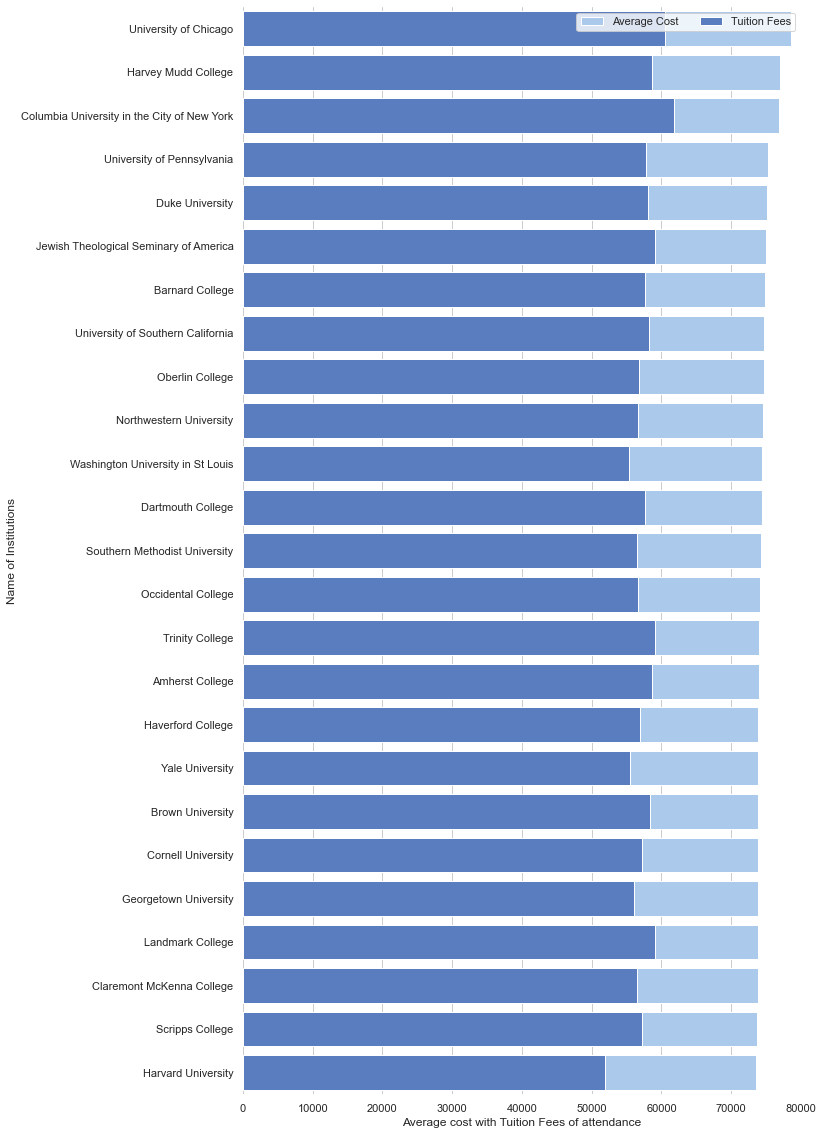

In [102]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 20))

# Load the example car crash dataset


# Plot the total cost
sns.set_color_codes("pastel")
sns.barplot(y="INSTNM",x="COSTT4_A",
           data = df_features_inst_top25_state_cnt_hist,
           label="Average Cost", color="b")

# Plot the Tuition Fess
sns.set_color_codes("muted")
sns.barplot(x="TUITIONFEE_IN", y="INSTNM", data=df_features_inst_top25_state_cnt_hist,
            label="Tuition Fees", color="b")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)

ax.set(xlim=(0, 80000), ylabel="Name of Institutions",
       xlabel="Average cost with Tuition Fees of attendance")

In [80]:
df_features_inst_top25_state_cnt_hist

,INSTNM,COSTT4_A
877,University of Chicago,78555.0
308,Harvey Mudd College,76953.0
2107,Columbia University in the City of New York,76907.0
2929,University of Pennsylvania,75303.0
2365,Duke University,75105.0
2173,Jewish Theological Seminary of America,75041.0
2077,Barnard College,74777.0
468,University of Southern California,74738.0
2597,Oberlin College,74636.0
969,Northwestern University,74630.0


<AxesSubplot:xlabel='INSTNM', ylabel='Count'>

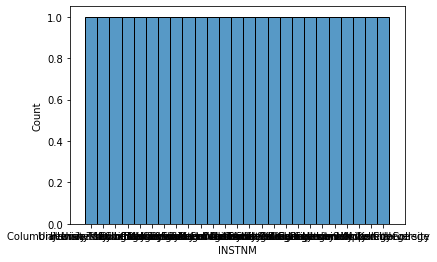

In [81]:
sns.histplot(data = df_features_inst_top25_state_cnt_hist
            ,x = 'INSTNM'
            )